https://public.tableau.com/app/profile/vladimir.petrov6121/viz/MetanpromDASH/sheet2?publish=yes

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

***Аналитическое исследование банка «Метанпромбанк»***
    
Наша задача , провести аналитическое исследование , выявить как клиенты пользуются нашими услугами , 
а так же составить портрет клиентов, которые склонны уходить из банка.

**Цель исследования:**
    
1) Изучить данные 
    
2) Провести предобработку данных
    
3) Исследовать данные в целом , выявить закономерности

4) Сегментировать пользователей на основе данных о количестве потребляемых продуктов,
    
5) Проверить гиппотезы    

6) Сделать промежуточные и общий выводы 
    
7) Дать рекомендации , основываясь на результатах исследования
    
    
**Описание данных:**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий 
и Рыбинск.

файл 'bank_dataset.csv'

Колонки:

- `userid` — идентификатор пользователя

- `score` — баллы кредитного скоринга

- `City` — город

- `Gender` — пол

- `Age` — возраст

- `Objects` — количество объектов в собственности

- `Balance` — баланс на счёте

- `Products` — количество продуктов, которыми пользуется клиент

- `CreditCard` — есть ли кредитная карта

- `Loyalty` — активный клиент

- `estimated_salary` — заработная плата клиента

- `Churn` — ушёл или нет

    


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

## Изучение данных 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import datetime as dt
from scipy import stats as st
import math as mth
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from plotly import graph_objects as go
import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
path = 'bank_dataset.csv'
if os.path.exists(path):
    path = 'bank_dataset.csv'
else:
    path = '/datasets/bank_dataset.csv'
    
df = pd.read_csv(path)

In [3]:
df

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
df.describe().round()

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,10000.0,10000.0,10000.0,10000.0,6383.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,15733677.0,651.0,39.0,5.0,119827.0,2.0,1.0,1.0,100090.0,0.0
std,71936.0,97.0,10.0,3.0,30095.0,1.0,0.0,0.0,57510.0,0.0
min,15608437.0,350.0,18.0,0.0,3769.0,1.0,0.0,0.0,12.0,0.0
25%,15671264.0,584.0,32.0,3.0,100182.0,1.0,0.0,0.0,51002.0,0.0
50%,15733474.0,652.0,37.0,5.0,119840.0,1.0,1.0,1.0,100194.0,0.0
75%,15795970.0,718.0,44.0,7.0,139512.0,2.0,1.0,1.0,149388.0,0.0
max,15858426.0,850.0,92.0,10.0,250898.0,4.0,1.0,1.0,199992.0,1.0


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

userid                 0
score                  0
City                   0
Gender                 0
Age                    0
Objects                0
Balance             3617
Products               0
CreditCard             0
Loyalty                0
estimated_salary       0
Churn                  0
dtype: int64

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
Перед нами датасет 'bank_dataset.csv'. Датасет имеет 10000 строк и и 12 колонок. В дальнейшем названия колонок надо поменять а также привести к единому регистру. При первичном анализе были выявлены пропущенные значения в колонке balance. Дубликаты не были обнаружены. Также столбцы надо привести к соответствующему типу данных. 

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

## Предобработка данных 

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

**Преобразование названий колонок**

In [8]:
df.columns = df.columns.str.lower()
df.columns = ['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance', 'products', 'credit_card', 'loyalty', 'salary', 'churn']
display(df.head())

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

**Изменение типа данных**

In [9]:
df['credit_card'] = df['credit_card'].astype('bool')
df['loyalty'] = df['loyalty'].astype('bool')
df['churn'] = df['churn'].astype('bool')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      10000 non-null  int64  
 1   score        10000 non-null  int64  
 2   city         10000 non-null  object 
 3   gender       10000 non-null  object 
 4   age          10000 non-null  int64  
 5   objects      10000 non-null  int64  
 6   balance      6383 non-null   float64
 7   products     10000 non-null  int64  
 8   credit_card  10000 non-null  bool   
 9   loyalty      10000 non-null  bool   
 10  salary       10000 non-null  float64
 11  churn        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(5), object(2)
memory usage: 732.5+ KB


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

**Обработка пропущенных значений**

In [11]:
df.isna().sum()

user_id           0
score             0
city              0
gender            0
age               0
objects           0
balance        3617
products          0
credit_card       0
loyalty           0
salary            0
churn             0
dtype: int64

In [12]:
isna = df.query('balance.isna()')
isna = isna.round()

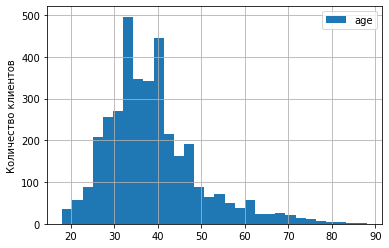

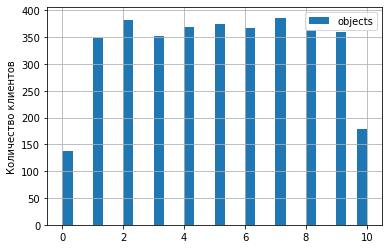

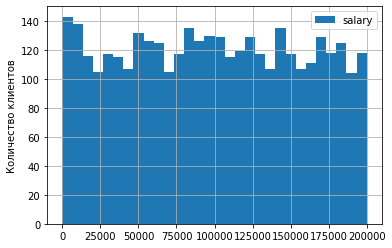

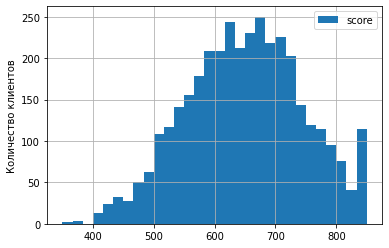

In [13]:
for column in ['age','objects', 'salary', 'score' ]:
    isna.plot(y = column, kind = 'hist', bins = 30, grid = True)
    plt.ylabel('Количество клиентов')

In [14]:
for column in ['city','products','credit_card','loyalty', 'churn']:
    print(column)
    print(round(isna[column].value_counts(normalize=True),2))
    print()    

city
Ярославль    0.67
Рыбинск      0.33
Name: city, dtype: float64

products
2    0.72
1    0.25
3    0.03
4    0.00
Name: products, dtype: float64

credit_card
True     0.72
False    0.28
Name: credit_card, dtype: float64

loyalty
True     0.52
False    0.48
Name: loyalty, dtype: float64

churn
False    0.86
True     0.14
Name: churn, dtype: float64



<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

По данным мы видим что пропущенные значения чаще всего попадаются у клиентов :
    
1) Из Ярославля и Рыбинска 

2) Которые имеют 2 продукта

3) У которых есть кредитная карта 

4) У действующих клиентов банка 

Также можно заметить что особой взаимосвязи между пропущенными значениями и данными в целом нету. Их количество достаточно велико (36%) , удалив их либо заменив каким либо числом мы создадим выбросы. Поэтому оставим без изменений. 

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

**Выявление выбросов**

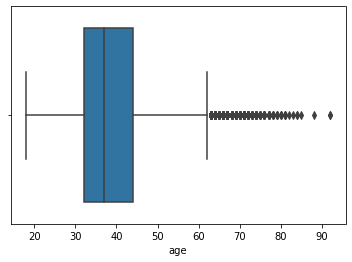

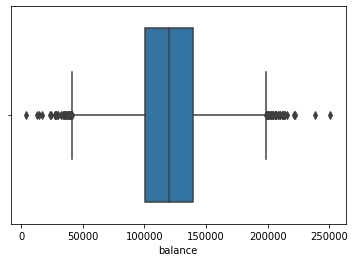

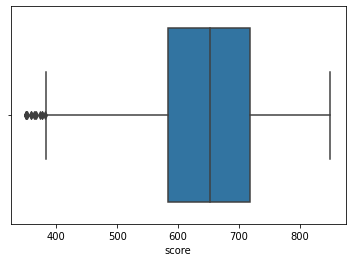

In [15]:
for column in ['age', 'balance' , 'score' ]:
    plt.figure()
    sns.boxplot(x=column, data=df)
    plt.show();

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

По графикам мы видим что аномалиями являются клиенты старше 62 лет , клиенты с заработной платой до 40000 и 
свыше 200000 , а также клиенты с рейтингом ниже 380

In [16]:
print('Количество клиентов старше 62 лет:', len(df.query('age > 62')))
print(round(len(df.query('age > 62'))/len(df)*100, 2) , '%')

Количество клиентов старше 62 лет: 359
3.59 %


In [17]:
print('Количество клиентов с аномальным балансом:', len(df.query('balance > 200000 or balance < 40000')))
print(len(df.query('balance > 200000 or balance < 40000'))/len(df)*100 , '%')

Количество клиентов с аномальным балансом: 63
0.63 %


In [18]:
print('Количество клиентов с аномальным рейтингом:', len(df.query('380 > score')))
print(round(len(df.query('380 > score'))/len(df)*100 , 2) ,'%')

Количество клиентов с аномальным рейтингом: 14
0.14 %


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

В сумме количество выбросов не превышает 5 процентов 

In [19]:
anomal = df.query('balance > 200000 or balance < 40000')
df.drop(anomal.index, axis=0, inplace=True)

In [20]:
df = df.query('age <= 62')
df = df.query('score > 380')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9567 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      9567 non-null   int64  
 1   score        9567 non-null   int64  
 2   city         9567 non-null   object 
 3   gender       9567 non-null   object 
 4   age          9567 non-null   int64  
 5   objects      9567 non-null   int64  
 6   balance      6088 non-null   float64
 7   products     9567 non-null   int64  
 8   credit_card  9567 non-null   bool   
 9   loyalty      9567 non-null   bool   
 10  salary       9567 non-null   float64
 11  churn        9567 non-null   bool   
dtypes: bool(3), float64(2), int64(5), object(2)
memory usage: 775.5+ KB


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
В ходе предобработки данных было проделаны следующие действия:
    
* Изменены названия столбцов , а также приведены к одному регистру

* Изменены типы данных 

* Выявлены  пропущенные значения. Выло выявлено 36% пропущенных значений. Особой взаимосвязи между данными и пропущенными значениями не было выявлено , поэтому принято решение не удалять и не изменять их , дабы не исказить данные.

* Дубликатов не было выявлено.

* Также в датасете произвели анализ на выбросы. Аномальные значения были удалены так как составляли  меньше 5% от всего обьема 
датасета.

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

## Исследовательский анализ данных 

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
**Общая картина**

In [22]:
display(df.drop(['user_id'], axis=1).describe())

,score,age,objects,balance,products,salary
count,9567.000000,9567.000000,9567.000000,6088.000000,9567.000000,9567.000000
mean,650.725619,37.783004,5.018919,119725.315496,1.532246,100040.404027
std,96.166476,8.801262,2.888614,28885.643963,0.581062,57531.353112
min,382.000000,18.000000,0.000000,40105.510000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,100354.145000,1.000000,50907.565000
50%,652.000000,37.000000,5.000000,119776.245000,1.000000,100127.710000
75%,718.000000,43.000000,7.500000,139186.295000,2.000000,149376.125000
max,850.000000,62.000000,10.000000,199689.490000,4.000000,199992.480000


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

Если смотреть на данные в целом то можно отметить следующией факторы (с учетом поправки на отсутствие выбросов) :
    
* Баллы кредитного скоринга варьируются от 382 до 850. Средний рейтинг составляет 650 
    
* Возраст - минимальный 18 лет , максимальный 62 года. Средний возраст клиента банка составляет 37 лет.
    
* 11000 p. - минимальная заработаная плата у клиента , максимальная - 200000 р.
    
* В среднем у клиента 5 обьектов собственности 
    
* Клиенты имеют от одного до четырех продуктов банка. 
    
 

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
**Гендерное распределенеие клиентов**

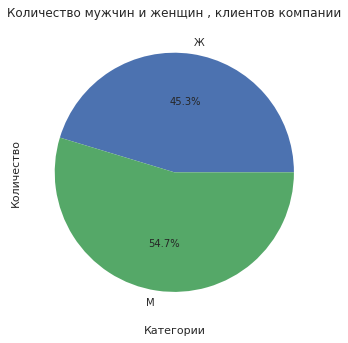

gender
Ж    4335
М    5232
Name: user_id, dtype: int64

In [23]:
gender_id = df.groupby('gender')['user_id'].agg('count')
with plt.style.context('seaborn'):
    gender_id.plot(kind='pie' , autopct='%1.1f%%')
plt.title('Количество мужчин и женщин , клиентов компании')
plt.xticks(rotation=0)
plt.xlabel('Категории')
plt.ylabel('Количество')
plt.show()
display(gender_id)

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

По распределению мы видим что мужчин не намного , но больше чем женщин. 5232 мужчин и 4335 женщин.

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
**Распределение клиентов по возрасту**

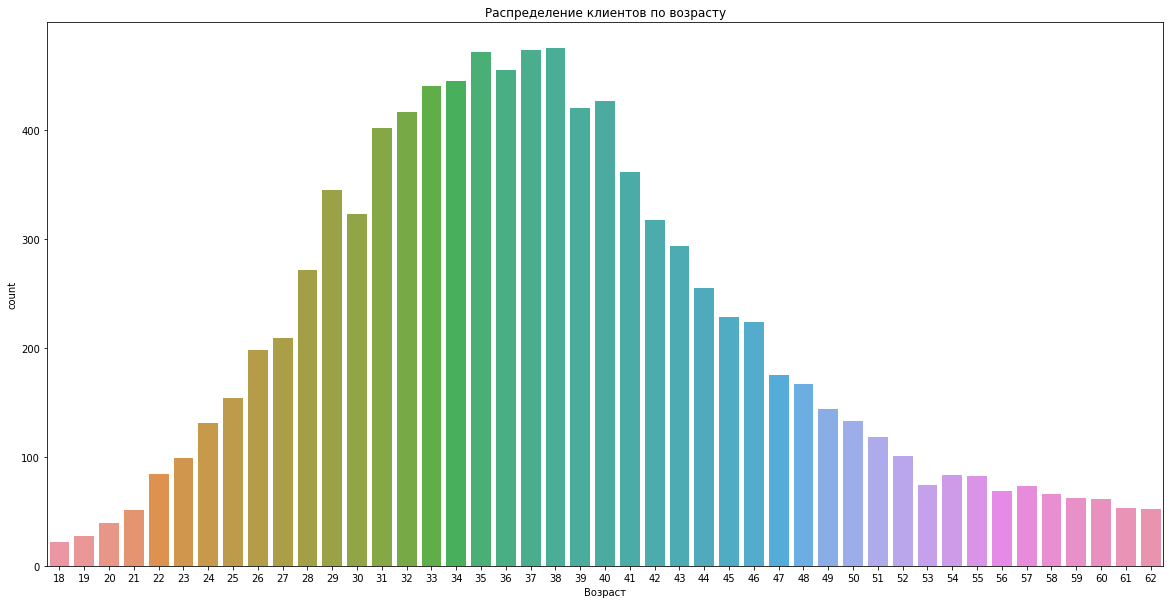

In [24]:
age_id = df.groupby('age')['user_id'].agg('count')
plt.figure(figsize=(20, 10))
sns.countplot(x='age', data=df)
plt.xticks(rotation=0)
plt.title('Распределение клиентов по возрасту')
plt.xlabel("Возраст")
plt.show()

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
По распределению можно заметить что большинство клиентов имеют возраст в среднем от 31 года до 40 лет

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
**Распределение клиентов по городам**

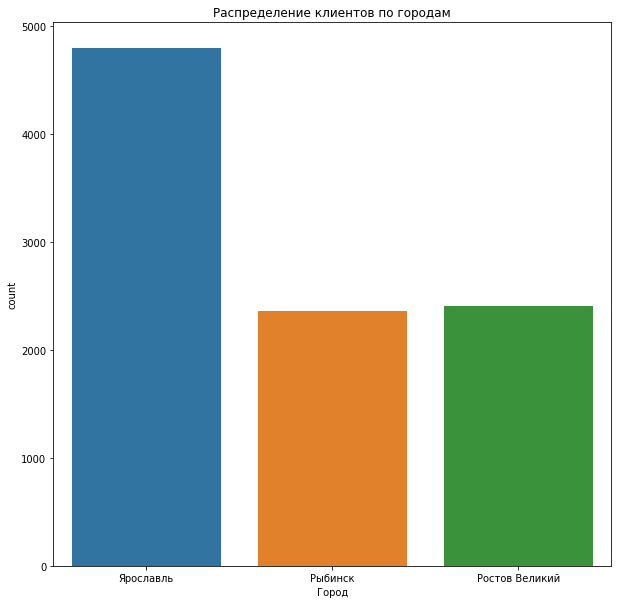

city
Ростов Великий    2407
Рыбинск           2361
Ярославль         4799
Name: user_id, dtype: int64

In [25]:
city_id = df.groupby('city')['user_id'].agg('count')
plt.figure(figsize=(10, 10))
sns.countplot(x='city', data=df)
plt.xticks(rotation=0)
plt.title('Распределение клиентов по городам')
plt.xlabel("Город")
plt.show()
city_id

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

По данным мы видим что большинство клиентов банка находятся в Ярославле (4799) , далее жители Ростова Великого (2407) и Рыбинска (2361)

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
**Распределение клиентов по наличию кредитной карты**

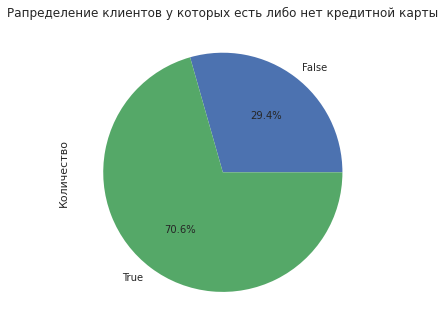

credit_card
False    2814
True     6753
Name: user_id, dtype: int64

In [26]:
card_id = df.groupby('credit_card')['user_id'].agg('count')
with plt.style.context('seaborn'):
    card_id.plot(kind='pie' , autopct='%1.1f%%')
plt.title('Рапределение клиентов у которых есть либо нет кредитной карты')
plt.xticks(rotation=0)
plt.ylabel('Количество')
plt.show()
display(card_id)

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
6753 (70.6%) клиентов банка имеют кредитные карты банка , 2814 (29.4%) - не имеют

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
**Распределение клиентов по количеству продуктов**

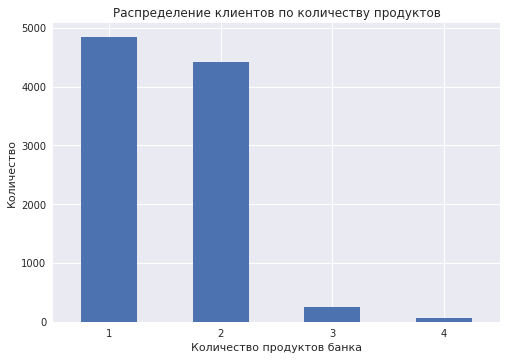

products
1    4841
2    4418
3     250
4      58
Name: user_id, dtype: int64

In [27]:
product_id = df.groupby('products')['user_id'].agg('count')
with plt.style.context('seaborn'):
    product_id.plot(kind='bar')
plt.title('Распределение клиентов по количеству продуктов')
plt.xticks(rotation=0)
plt.xlabel('Количество продуктов банка')
plt.ylabel('Количество')
plt.show()
display(product_id)

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
Подавляющее большинство клиентов банка имеют только один либо два продукта. 

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
**Ушедшие и оставшиеся клиенты банка**

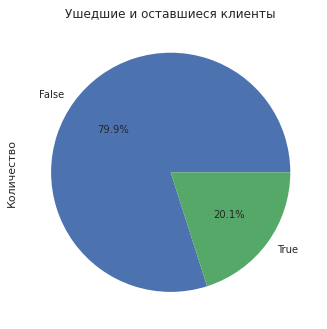

churn
False    7646
True     1921
Name: user_id, dtype: int64

In [28]:
churn_id = df.groupby('churn')['user_id'].agg('count')
with plt.style.context('seaborn'):
    churn_id.plot(kind='pie' , autopct='%1.1f%%')
plt.title('Ушедшие и оставшиеся клиенты')
plt.xticks(rotation=0)
plt.ylabel('Количество')
plt.show()
display(churn_id)

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
Только 20% от всех клиентов банка ушли , 80% остались. 

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
**Распрделение клиентов по обьектам в собственности**

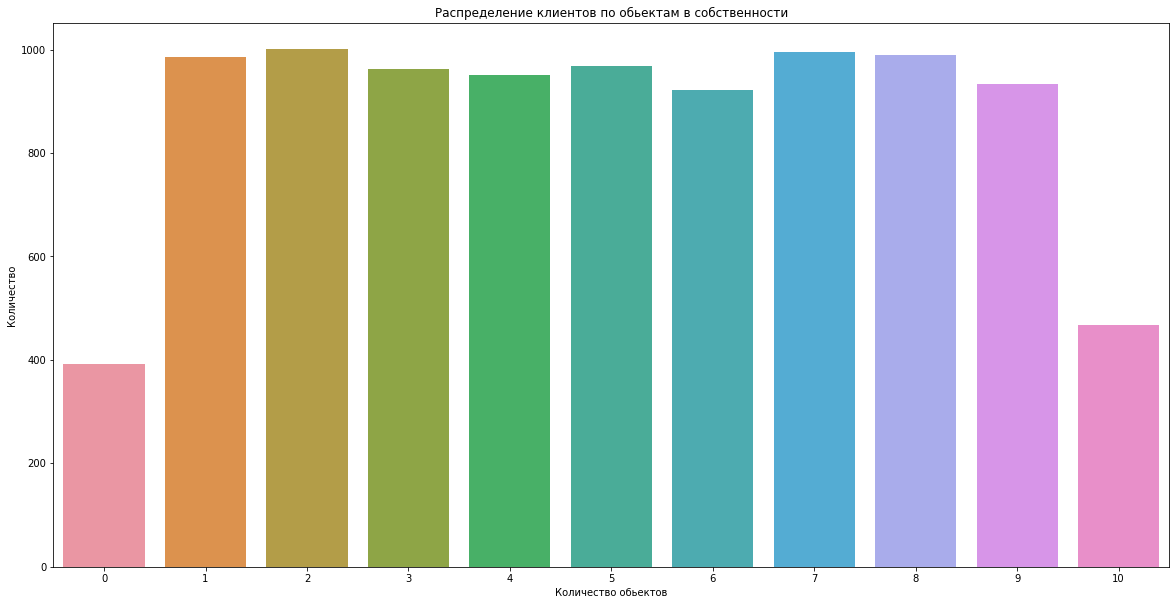

In [29]:
objects_id = df.groupby('objects')['user_id'].agg('count')
plt.figure(figsize=(20, 10))
sns.countplot(x='objects', data=df)
plt.xticks(rotation=0)
plt.title('Распределение клиентов по обьектам в собственности')
plt.xlabel("Количество обьектов")
plt.ylabel('Количество')
plt.show()

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
**Распределение клиентов по  рейтингу , балансу и заработной плате и возрасту**

In [51]:
num_col = ['score', 'age', 'balance', 'salary']
location_num = [221, 222, 223, 224]

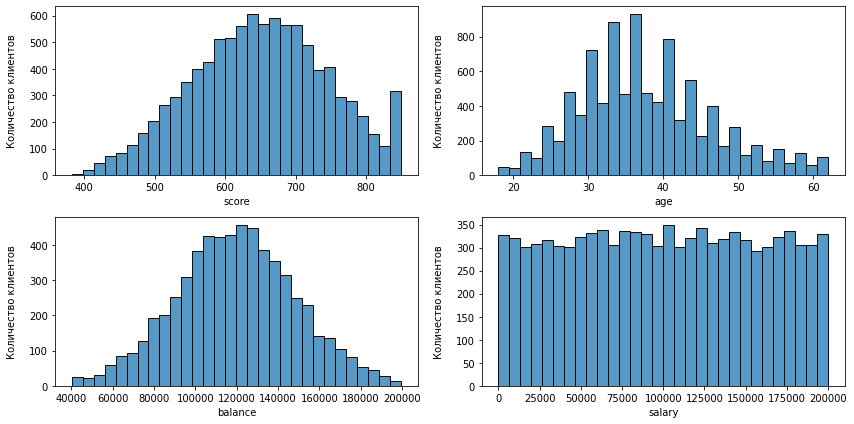

In [52]:
plt.figure(figsize=(12, 6))
for col, number in zip(num_col, location_num):
    plt.subplot(number)
    sns.histplot(df, x=col, bins=30)
    plt.ylabel('Количество клиентов', fontsize=10, labelpad=12)
plt.tight_layout()
plt.show();

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
* Большинство клиентов имеют рейтинг от 600 до 700. Однако присутствует достаточно большой кластер пользователей с 
рейтингом 850.
    
* Остаток на счету в районе 100-150 т. рублей. 
 
* Средний возраст 30 - 40 лет.

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
**Матрица корреляции**

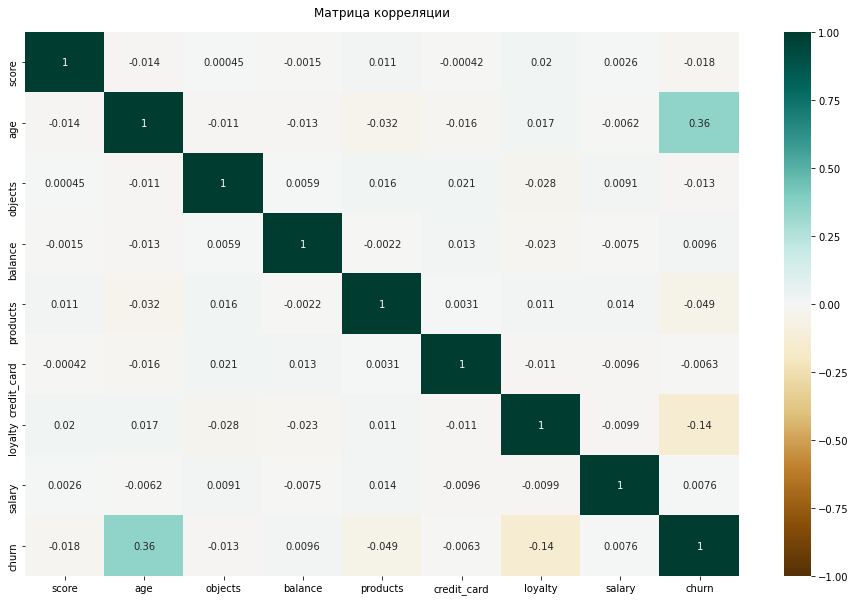

In [32]:
df_corr = df.drop(['user_id'], axis=1)
plt.figure(figsize=(16, 10)) 
heatmap = sns.heatmap(df_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG') 

heatmap.set_title('Матрица корреляции', fontdict={'fontsize':12}, pad=16);

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

Матрица корреляции показывает нам что присутсвуют взаимосвязи между churn и age , а также между loyalty и churn.

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
В ходе проведения исследовательского анализа данных мы выявили следующие закономерности : 
    
* Клиентами банка чаще являются мужчины - 5232 мужчин и 4335 женщин.
* Большинство клиентов  имеют возраст от 31 года до 40 лет.
* Большинство клиентов находятся в городе Ярославль.
* Кредитные карты есть у 70% клиентов.
* Большинство клиентов имеют 1 либо 2 продукта.
* 20% - процент оттока клиентов из банка.
* Большинство клиентов имеют рейтинг от 600 до 700. Однако присутствует достаточно большой кластер пользователей с 
рейтингом 850.
* Большинство клиентов имеют остаток на счету в районе 100-150 т. рублей
    
    

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
**Особенности ушедших клиентов**

In [33]:
churn_df = df.query('churn == True')
churn_df

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,True,True,101348.88,True
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,True,False,113931.57,True
5,15616748,645,Рыбинск,М,44,8,113755.78,2,True,False,149756.71,True
16,15780188,653,Ростов Великий,М,58,1,132602.88,1,True,False,5097.67,True
22,15742045,510,Рыбинск,Ж,38,4,NaN,1,True,False,118913.53,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,15715490,498,Ростов Великий,М,42,3,152039.70,1,True,True,53445.17,True
9982,15810899,655,Ростов Великий,Ж,46,7,137145.12,1,True,False,115146.40,True
9991,15812695,597,Ярославль,Ж,53,4,88381.21,1,True,False,69384.71,True
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,False,True,42085.58,True


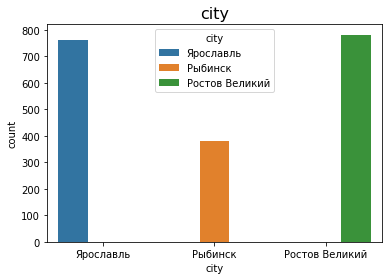

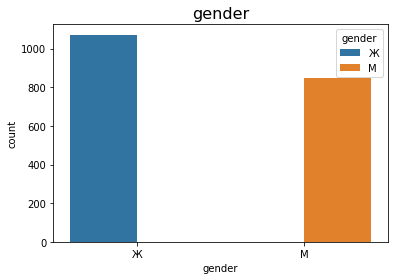

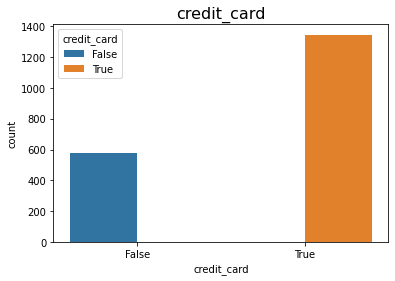

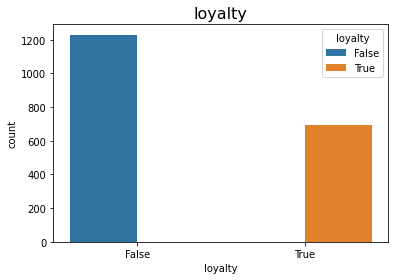

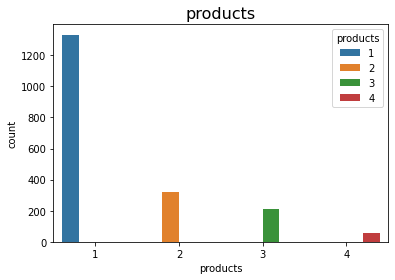

In [34]:
for column in ['city','gender', 'credit_card','loyalty' , 'products']:
        ax = sns.countplot(data=churn_df, x=column, hue=column);
        plt.title(column, fontsize = 16, color = 'black')
        plt.show()

In [35]:
num_col = ['score', 'age', 'balance', 'salary']
location_num = [221, 222, 223, 224]

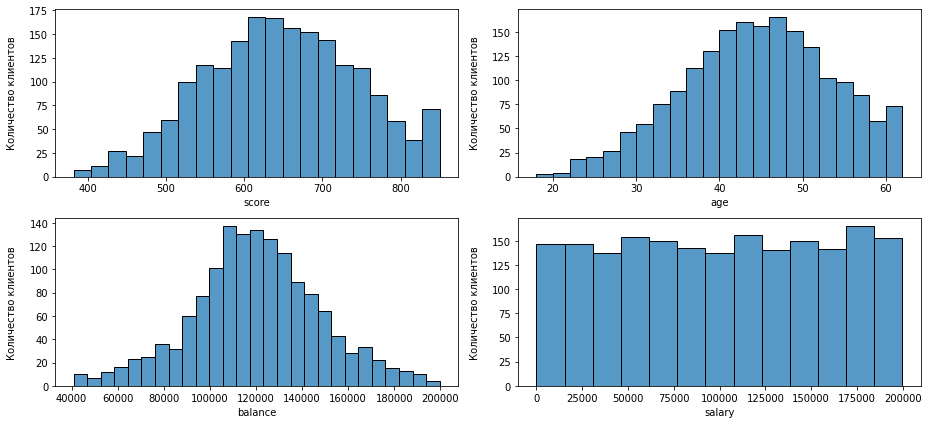

In [36]:
plt.figure(figsize=(13, 6))
for col, number in zip(num_col, location_num):
    plt.subplot(number)
    sns.histplot(churn_df, x=col, palette='magma', legend=False)
    plt.ylabel('Количество клиентов', fontsize=10, labelpad=12)
    plt.tight_layout()
plt.show();

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
Основываяся на данные по ушедшим клиентам можно выделить следующие моменты. Портрет пользователей которые ушли:
    
* Преимущественно из Ярославля и Ростова-Великого
    
* В большинстве случаев это мужчины 
    
* Имеют в наличии кредитную карту 
    
* В большинстве случаев это не активные клиенты 
    
* Подвляющее больщинство имело лишь один продукт банка 
    
* Имеют средний рейтинг 600 
    
* Возраст 40 -  50  лет 
    

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

## Сегментация пользователей

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
**Сегментация пользователей на основе данных о количестве потребляемых продуктов**

In [37]:
df['products'].value_counts()

1    4841
2    4418
3     250
4      58
Name: products, dtype: int64

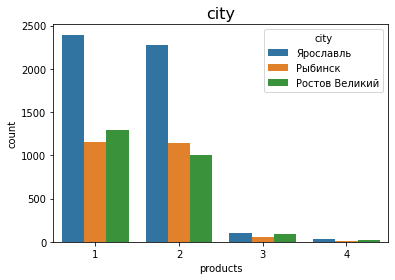

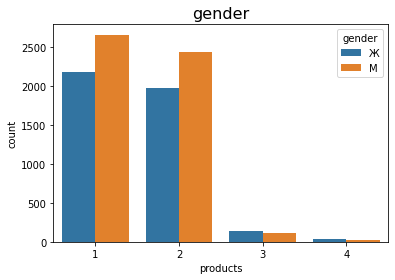

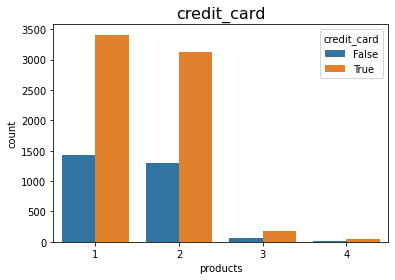

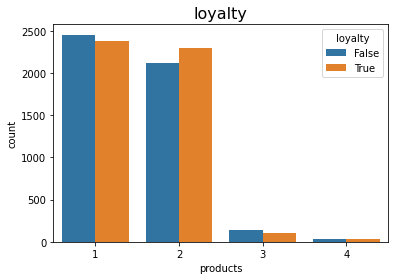

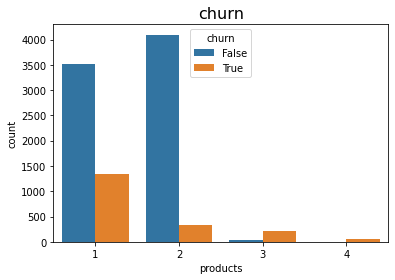

In [38]:
for column in ['city','gender','credit_card','loyalty', 'churn']:
        ax = sns.countplot(data=df, x='products', hue=column);
        plt.title(column, fontsize = 16, color = 'black')
        plt.show()

In [39]:
one_pro=df.query('products == 1')
two_pro=df.query('products == 2')
tree_pro=df.query('products == 3')
four_pro=df.query('products == 4')

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
**Клиенты имеющие 1 продукт в использовании**

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
В данном разделе я не стал обьединять все графики в один большой , дабы посмотреть на метрики для каждого сегмента в отдельности.

In [40]:
num_col = ['score', 'age', 'balance', 'salary']

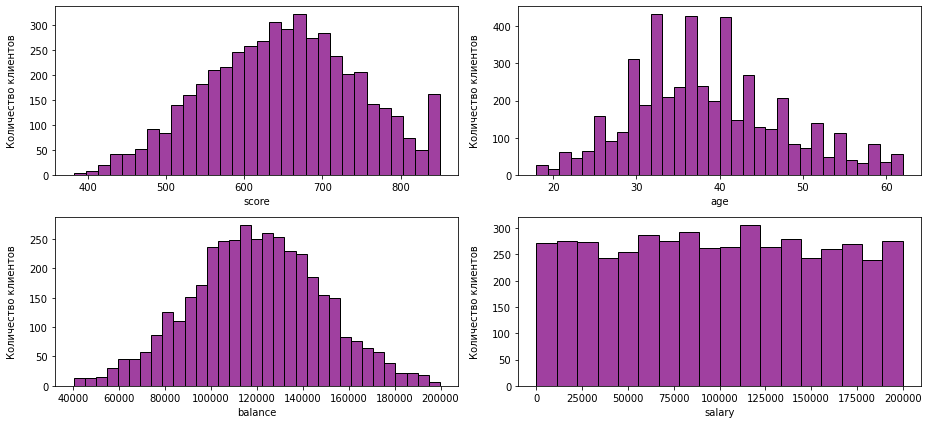

In [41]:
plt.figure(figsize=(13, 6))
for col, number in zip(num_col, location_num):
    plt.subplot(number)
    sns.histplot(one_pro, x=col, color='purple', legend=False)
    plt.ylabel('Количество клиентов', fontsize=10, labelpad=12)
    plt.tight_layout()
plt.show();

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
**Клиенты имеющие 2 продукта в использовании**

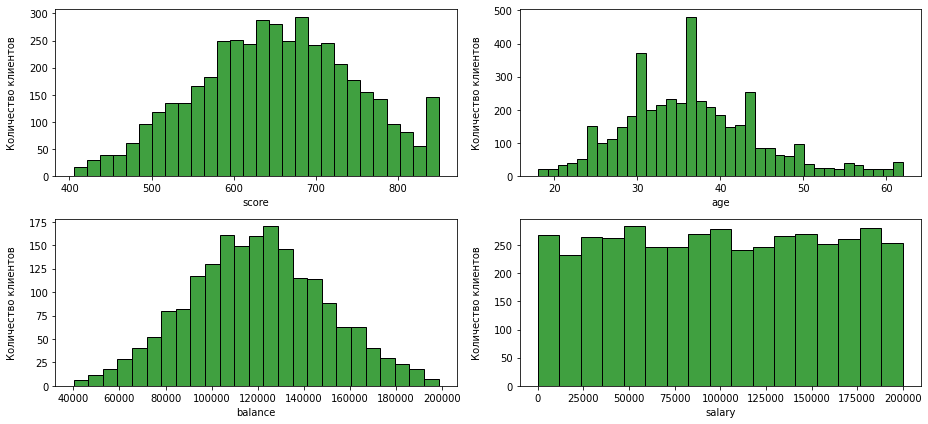

In [42]:
plt.figure(figsize=(13, 6))
for col, number in zip(num_col, location_num):
    plt.subplot(number)
    sns.histplot(two_pro, x=col, legend=False , color='green')
    plt.ylabel('Количество клиентов', fontsize=10, labelpad=12)
    plt.tight_layout()
plt.show();

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
**Клиенты имеющие 3 продукта в использовании**

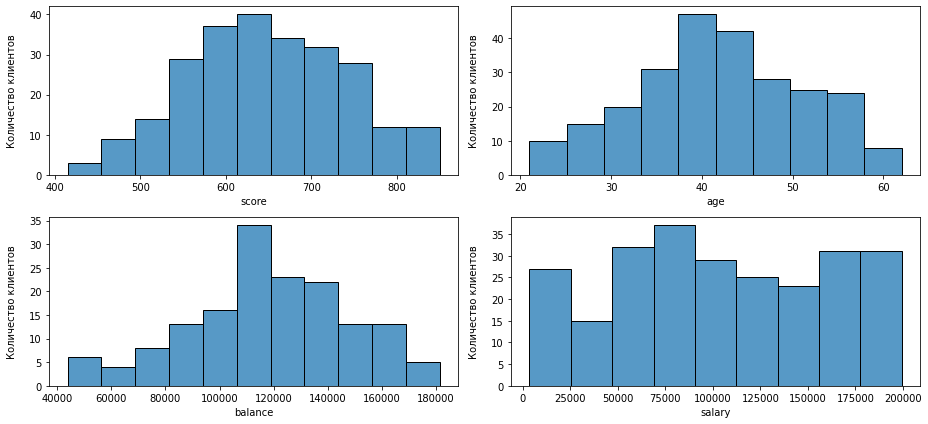

In [43]:
plt.figure(figsize=(13, 6))
for col, number in zip(num_col, location_num):
    plt.subplot(number)
    sns.histplot(tree_pro, x=col, legend=False)
    plt.ylabel('Количество клиентов', fontsize=10, labelpad=12)
    plt.tight_layout()
plt.show();

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
**Клиенты имеющие 4 продукта в использовании**

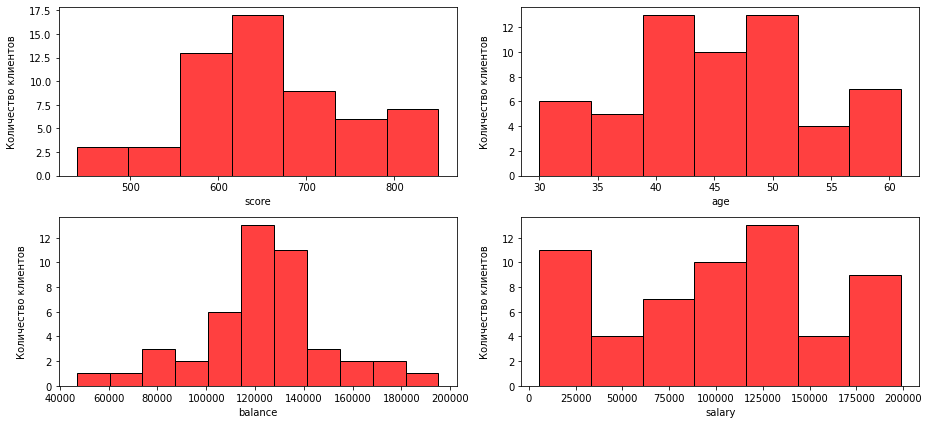

In [44]:
plt.figure(figsize=(13, 6))
for col, number in zip(num_col, location_num):
    plt.subplot(number)
    sns.histplot(four_pro, x=col, color='red', legend=False)
    plt.ylabel('Количество клиентов', fontsize=10, labelpad=12)
    plt.tight_layout()
plt.show();

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

При сегментации пользователей по признаку количества потребляемых продуктов мы выявили следующие закономерности и составили  портреты для каждого сегмента:
    
* **Сегмент №1** (клиенты используют один продукт) - Самый многочисленный  сегмент - 4841 пользователь. Большинство клиентов находятся в Ярославле. Преимущественно это мужчины. Подавляющее число имеют кредитные карты. Практически равное распределение активных и неактивных пользователей(неактивных чуть больше). В  основном  это клиенты которые остались в банке . однако есть достаточный процент ушедших. Средний рейтинг 600 - 700 однако присутствует большой обьем клиентов с рейтингом 800 +. Возраст 30 - 40 лет. Баланс на счету 100000 - 150000 р. 
    
* **Сегмент №2** (клиенты используют два продукта) - всего 4418 пользователей. Большинство клиентов находятся в Ярославле. Преимущественно это мужчины. Подавляющее число имеют кредитные карты. Практически равное распределение активных и неактивных пользователей(активных чуть больше). В  основном  это клиенты которые остались в банке. Среднгий ретйинг 600-700 , также присутствует хорошее количество клиентов с максимальным рейтингом. Возраст 30 - 45 лет. Баланс на счету 110000 - 135000 р.
      
* **Сегмент №3** (клиенты используют три продукта) - всего 250 пользователей. Большинство клиентов находятся в Ярославле и Ростове Великом. Преимущественно это женщины. Имеют кредитные карты. Практически равное распределение активных и неактивных пользователей(неактивных чуть больше). В основном  это клиенты которые ушли из банка. Средний рейтинг 550 - 750. Средний возраст 40-45 лет. Баланс на счету в среднем 110000 р.
    
* **Сегмент №4** (клиенты используют чертыре продукта) - Самый малочисленный сегмент - всего 58 пользователей. Большинство клиентов находятся в Ярославле. Преимущественно это женщины. Подавляющее число имеют кредитные карты. Практически равное распределение активных и неактивных пользователей. Практически все клиенты данного сегмента ушли из банка. Средний рейтинг 550-650. Возраст 40-50 лет. Большиснтво клиентов имеют баланс на счету 120000 - 140000 р. 

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

## Проверка гипотез 

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

**ГИПОТЕЗА №1** 

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

Проверим гипотезу о разнице возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.
    
* Н-0: Средний возраст клиентов, использующих один продукт равен среднему возрасту клиентов, использующих два продукта

* Н-1: Средний возраст клиентов, использующих один продукт не равен среднему возрасту клиентов, использующих два продукта

In [45]:
age_one = df[(df['products']==1)]['age']
age_two = df[(df['products']==2)]['age']

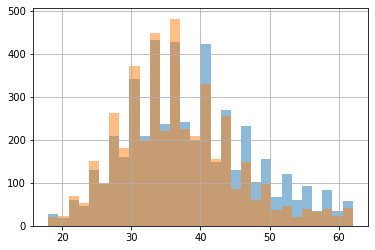

In [46]:
age_one.hist(bins = 30, alpha=0.5)
age_two.hist(bins = 30, alpha=0.5);

In [47]:
results = st.ttest_ind(age_one, age_two, equal_var=False)

alpha = 0.05

print(results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

4.227205255871811e-25
Отвергаем нулевую гипотезу


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;"> 
    
Результат теста  гипотезы №1 показывает что средний возраст клиентов, использующих один продукт не равен среднему возрасту клиентов, использующих два продукта.

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

**ГИПОТЕЗА №2** 

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

Проверим гипотезу о разнице доходов между теми клиентами, которые пользуются тремя продуктами банка, и теми, кто использует четыре продукта.
    
* Н-0: Средний доход клиентов, использующих три продукта равен среднему доходу клиентов, использующих четыре продукта

* Н-1: Средний доход клиентов, использующих три продукта не равен среднему доходу клиентов, использующих четыре продукта

In [48]:
salary_one = df[(df['products']==3)]['salary']
salary_two = df[(df['products']==4)]['salary']

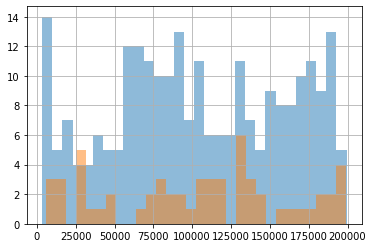

In [49]:
salary_one.hist(bins = 30, alpha=0.5)
salary_two.hist(bins = 30, alpha=0.5);

In [50]:
results = st.ttest_ind(salary_one, salary_two, equal_var=False)

alpha = 0.05

print(results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.8792795394917324
Не получилось отвергнуть нулевую гипотезу


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    
Результат теста гипотезы №2 показал что средний доход клиентов, использующих три продукта равен среднему доходу клиентов, использующих четыре продукта

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

## Общий вывод 

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;"> 

В ходе исследования были  произведены следующие действия :
    
* **Изучение данных** 

* **Предобработка данных** - скорректированы названия столбцов , выявлены пропущены значения , выявлены и удалены выбросы , заменены типы данных. 

* **Исследовательский анализ данных** - просмотрена общая картина данных , произведена разбивка клиентов в разрезе разных признаков , составлена матрица корреляции. Также составлен портрет , ушедших клиентов в целом.
    
* **Сегментация пользователей** - произведена сегментация пользователей в разрезе количества продуктов использования.Выявлены особенности присущие для каждого сегмента. 
 
* **Проверка гипотез**  - составлены и проверены две гипотезы. Гипотеза №1 - о разнице среднего возраста между клиентами использующими один продукт и теми кто использует два продукта (нулевая гипотеза отвержена - разница присутствует). Гипотеза №2- о разнице среднего дохода между клиентами кто использует три  продукта и теми кто ипользует 4 продукта (нулевая гипотеза принята - разница отсутствует)
    
* **Написаны общий и промежуточные выводы**
    
Рекомендации для каждого из сегментов:
    
* **Сегмент №1** - предлагать дополнительные продукты банка так как в этот сегмент входит самая молодая и активная группа клиентов. Разработать дпоплнительные продукты для женщин. 
    
* **Сегмент №2** - поддерживать активность и лояльность клиентов. Это один из самых усешных сегментов.
    
* **Сегмент №3** - провести дополнительное исследование и выяснить причину оттока. Разработать дополнительные продукты влияющие на удержвание клиента.
   
* **Сегмент №4** - таже как и с предадущим сегментом наблюдается большой отток. Выяснить причины и разработать продукты повышающие удержание. Также целесообразно разработать продукты для возрастных клиентов. 
    
Ко всему вышеперечисленному рекомендуется провести рекламные компании , в таких городах как Рыбинск и Ростов-Великий , так как в
этих регионах процент клиентов достаточно мал по сравнению с основной массой. 

